In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from solver_module import real_solution, solve, solve_hybrid, solve_symmetric, solve_hybrid_symmetric

In [17]:
density = 0.25
velocity = 2.0
u_L = 1.0
u_R = 0.0
p_L = 5.0
p_R = 2.0

In [18]:
def in_func_u(x):
    if (x <= 0):
        return u_L
    else:
        return u_R
def in_func_p(x):
    if (x <= 0):
        return p_L
    else:
        return p_R
def in_func_Y(x):
    return in_func_u(x) + in_func_p(x) / (density * velocity)
def in_func_Z(x):
    return in_func_u(x) - in_func_p(x) / (density * velocity)

In [19]:
h = 1.0 / 100
CFL = 0.5
tau = h * CFL / velocity
number_of_time_steps = 100
number_of_x_steps = 201
grid = np.linspace(-1, 1, number_of_x_steps)
real_sol_Y = real_solution(grid, h, tau, CFL, 1, number_of_time_steps, number_of_x_steps, in_func_Y)
real_sol_Z = real_solution(grid, h, tau, CFL, -1, number_of_time_steps, number_of_x_steps, in_func_Z)
real_sol_u = (real_sol_Y + real_sol_Z) / 2
real_sol_p = velocity * density * (real_sol_Y - real_sol_Z) / 2

border_value_Y = in_func_Y(-2)
border_value_Z = in_func_Z(2)

In [28]:
def show_system_sol(al00, al_10, num, order, CFL):
    sol_Y = solve(grid, h, tau, order, CFL, al00, al_10, number_of_time_steps, number_of_x_steps, border_value_Y, in_func_Y)
    sol_Z = solve_symmetric(grid, h, tau, order, CFL, al00, al_10, number_of_time_steps, number_of_x_steps, border_value_Z, in_func_Z)
    sol_u = (sol_Y + sol_Z) / 2
    sol_p = velocity * density * (sol_Y - sol_Z) / 2
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    plt.plot(grid, sol_u, label=r"$\alpha^{0}_{0} =$" + str(round(al00, 3)) + r"$, \alpha^{0}_{-1} = $" + str(round(al_10, 3)))
    plt.plot(grid, real_sol_u, label="exact solution")
    plt.legend(loc='lower left')
    plt.title("Velocity")
    plt.subplot(1, 2, 2)
    plt.plot(grid, sol_p, label=r"$\alpha^{0}_{0} =$" + str(round(al00, 3)) + r"$, \alpha^{0}_{-1} = $" + str(round(al_10, 3)))
    plt.plot(grid, real_sol_p, label="exact solution")
    plt.title("Pressure")
    plt.legend(loc='lower left')
    plt.savefig("system_sol_{}.png".format(num), bbox_inches="tight", dpi=300)

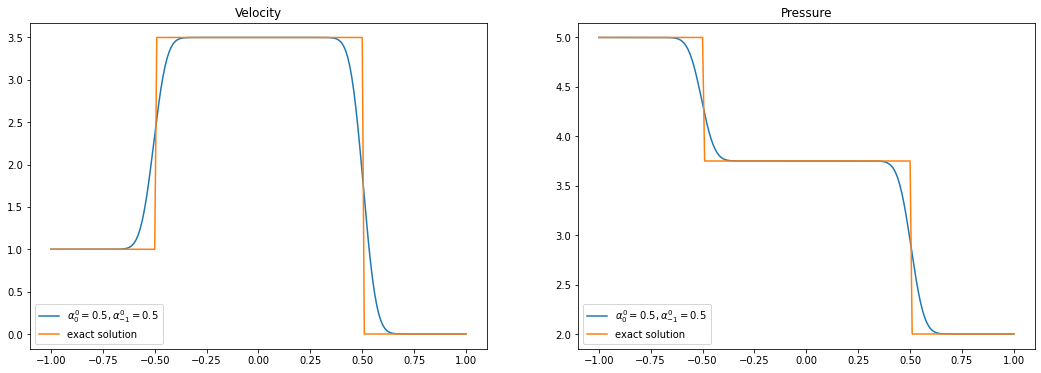

In [29]:
show_system_sol(0.5, 0.5, 1, 1, CFL)

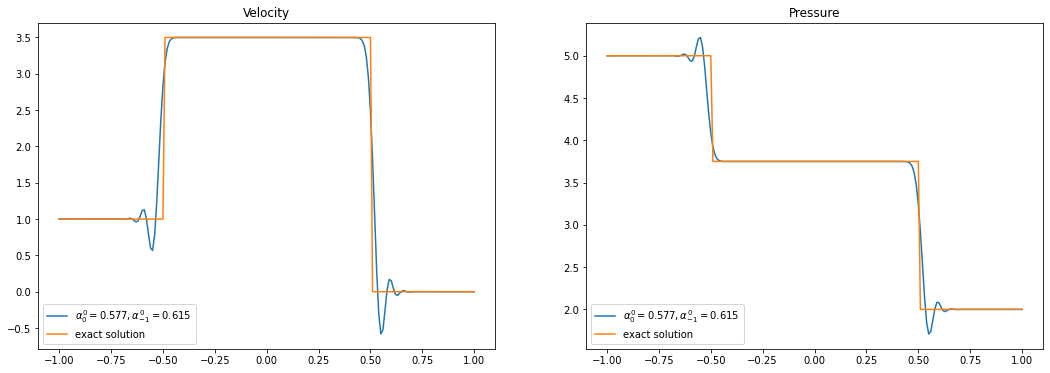

In [30]:
show_system_sol(15.0 / 26, 8.0 / 13, 2, 2, CFL)

In [31]:
# show_system_sol(3.0 / 4, 0.5, 1, 3, CFL)

In [32]:
def show_system_sol_hybrid(def_alpha00, def_alpha0_1, f_alpha00, f_alpha0_1, s_alpha00, s_alpha0_1, num, order,  CFL):
    sol_Y = solve_hybrid(grid, h, tau, order, CFL, number_of_time_steps, number_of_x_steps, def_alpha00, def_alpha0_1, f_alpha00, f_alpha0_1, s_alpha00, s_alpha0_1, border_value_Y, in_func_Y)
    sol_Z = solve_hybrid_symmetric(grid, h, tau, order, CFL, number_of_time_steps, number_of_x_steps, def_alpha00, def_alpha0_1, f_alpha00, f_alpha0_1, s_alpha00, s_alpha0_1, border_value_Z, in_func_Z)
    sol_u = (sol_Y + sol_Z) / 2
    sol_p = velocity * density * (sol_Y - sol_Z) / 2
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    plt.plot(grid, sol_u, label="hybrid")
    plt.plot(grid, real_sol_u, label="exact solution")
    plt.legend(loc='lower left')
    plt.title("Velocity")
    plt.subplot(1, 2, 2)
    plt.plot(grid, sol_p, label="hybrid")
    plt.plot(grid, real_sol_p, label="exact solution")
    plt.title("Pressure")
    plt.legend(loc='lower left')
    plt.savefig("system_sol_{}.png".format(num), bbox_inches="tight", dpi=300)

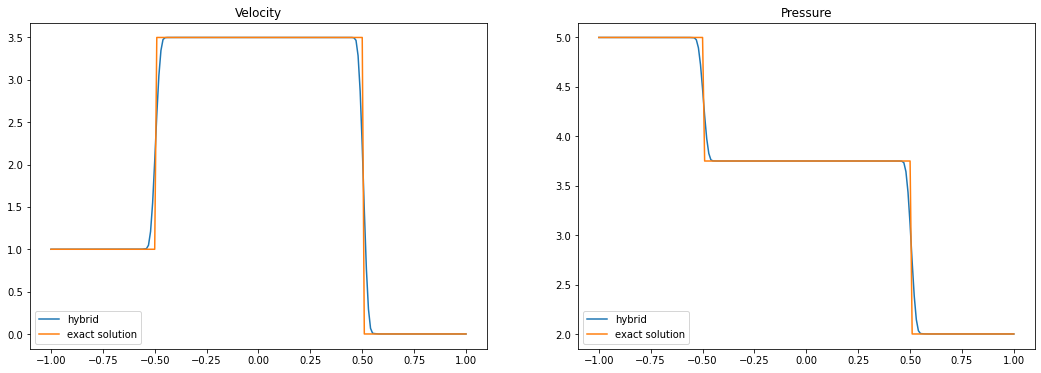

In [33]:
show_system_sol_hybrid(3.0 / 4, 1.0 / 2, 3.0 / 8, 3.0 / 4, 1.5, 0, 3, 3,  CFL)